In [1]:
#import pyodbc
#import sqlalchemy as sal
from sqlalchemy import create_engine
import pandas as pd
from config import db_link
engine = create_engine(db_link)
connection = engine.connect()

In [2]:
print(engine.table_names())

['dept_manager', 'salaries', 'titles', 'employees', 'departments', 'dept_emp']


In [4]:
salary_db = pd.read_sql("SELECT * FROM salaries;", connection)

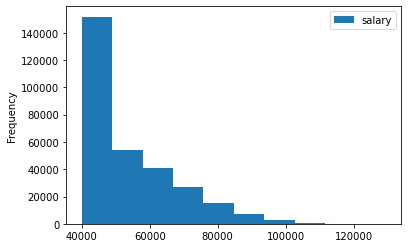

In [6]:
salary_db.plot.hist()

In [10]:
titles_db = pd.read_sql(
    "SELECT s.salary, t.title FROM salaries AS s " +
    "JOIN employees AS e ON s.emp_no = e.emp_no "+
    "JOIN titles AS t ON e.emp_title_id = title_id;", connection)

In [11]:
titles_db.head()

,salary,title
0,87084,Staff
1,48111,Engineer
2,63315,Staff
3,46740,Senior Engineer
4,54770,Senior Engineer


In [13]:
avg_salaries = titles_db.groupby('title').mean()

In [14]:
avg_salaries

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


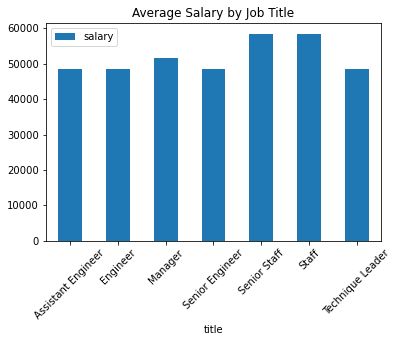

In [24]:
avg_salaries.plot(kind='bar', title='Average Salary by Job Title', rot=45)